# Ontology building on AllenNLP

In [1]:
import json
with open('allennlp_furtherfilter.json', 'r') as openfile:
  read_json = json.load(openfile)
triplets = read_json
for triple in triplets:
  assert len(triple) == 3
triplets

[["bitcoin 's developer", 'combine', 'technical implementation proficiency'],
 ['government', 'manufacture', 'money'],
 ['money', 'make', 'by run exchange'],
 ['certain proponent', 'have', 'no transparency'],
 ['bank', "be n't", 'yet'],
 ['Brian P. Hanley', 'take', 'for grant'],
 ['that debt', 'destroy', 'wealth'],
 ['venture capital', 'replace', 'loan'],
 ['voter - or Moran', 'underlie', 'social dynamic'],
 ['researcher', 'not claim', 'a Decentralization'],
 ['speculation', 'affect', 'BitCoin price'],
 ['Wikipedia', 'view', 'on BitCoin price'],
 ['Ladislav Kristoufek', 'contribute', 'to the discussion'],
 ['user', 'become', 'miner'],
 ['Bitcoin price', 'push', 'during rapid decline'],
 ['the interconnection', 'remain', 'quite stable'],
 ['such regulation', 'be', 'effective'],
 ['Jonathan Donier', 'decompose', 'the order flow'],
 ['by news', 'not explain', 'large price jump'],
 ['a cryptocurrency', 'know', 'for Bitcoin'],
 ['emotional valence', 'rise', 'exchange volume'],
 ['David Garc

In [2]:
len(triplets)

420

In [3]:
! pip install finbert-embedding

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 123 kB 4.6 MB/s 
     |████████████████████████████████| 132 kB 31.0 MB/s 
     |████████████████████████████████| 9.9 MB 33.4 MB/s 
     |████████████████████████████████| 79 kB 4.7 MB/s 
     |████████████████████████████████| 140 kB 37.1 MB/s 
     |████████████████████████████████| 127 kB 39.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


## Relation Ontology

In [4]:
import numpy as np
import pandas as pd

relations = np.array(triplets)[:, 1]

In [5]:
relations.shape

(420,)

In [6]:
unique_rel, count = np.unique(relations, return_counts = True)
rel_dict = dict(zip(unique_rel, count))
rel_dict = dict(sorted(rel_dict.items(), key = lambda x: x[1], reverse = True))
rel_dict

{'be': 55,
 'use': 19,
 'have': 16,
 'take': 13,
 'become': 10,
 'combine': 7,
 'is author of': 7,
 'perform': 7,
 'employ': 5,
 'find': 5,
 'make': 5,
 'analyze': 4,
 'follow': 4,
 'generate': 4,
 'obtain': 4,
 'pay': 4,
 'receive': 4,
 'represent': 4,
 'apply': 3,
 'be not': 3,
 'compare': 3,
 'exhibit': 3,
 'identify': 3,
 'investigate': 3,
 'leave': 3,
 'produce': 3,
 'set': 3,
 'shed': 3,
 'show': 3,
 'achieve': 2,
 'affect': 2,
 'approach': 2,
 'assume': 2,
 'build': 2,
 'calculate': 2,
 'carry': 2,
 'consider': 2,
 'construct': 2,
 'contribute': 2,
 'correlate': 2,
 'deal': 2,
 'derive': 2,
 'describe': 2,
 'distribute': 2,
 'dominate': 2,
 'focus': 2,
 'gain': 2,
 'get': 2,
 'give': 2,
 'grow': 2,
 'improve': 2,
 'include': 2,
 'involve': 2,
 'know': 2,
 'learn': 2,
 'look': 2,
 'miss': 2,
 'offer': 2,
 'outperform': 2,
 'play': 2,
 'provide': 2,
 'push': 2,
 'reduce': 2,
 'relate': 2,
 'remain': 2,
 'require': 2,
 'rise': 2,
 'seek': 2,
 'study': 2,
 'tackle': 2,
 'test': 2,
 

In [7]:
len(rel_dict)

193

#### Generating Embeddings for each relation

In [8]:
from finbert_embedding.embedding import FinbertEmbedding

finbert = FinbertEmbedding()

token_emb = {}
# rel_combined = list(set(" ".join(rel_dict.keys()).split(" ")))
for i in rel_dict.keys():
  word_embedding = finbert.word_vector(i)
  token_emb[i] = word_embedding

407986644/407986644 [==============================] - 12s 0us/step


In [9]:
assert rel_dict.keys() == token_emb.keys()

In [10]:
final_embedding = {}

for key in token_emb.keys():
  numpy_tensor = []
  for i in token_emb[key]:
    numpy_tensor.append(i.numpy())
  numpy_tensor = np.array(numpy_tensor)
  final_embedding[key] = np.mean(numpy_tensor, axis = 0)

In [11]:
assert rel_dict.keys() == final_embedding.keys()
assert token_emb.keys() == final_embedding.keys()

for i in final_embedding:
  assert final_embedding[i].shape[0] == 768

#### Converting Relation Embedding Dict into panadas DataFrame

In [12]:
data = pd.DataFrame(final_embedding.values(), index = final_embedding.keys())
data

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
be,1.331915,-0.446903,-0.444302,-1.006841,1.380263,2.111643,0.062852,0.278242,3.972542,-6.316217,...,0.826859,-1.567798,-2.469906,-1.422467,-2.023844,-2.425972,3.619842,-0.685051,-1.124934,0.128575
use,-1.765478,1.210265,-0.022758,1.257449,3.533936,1.878150,-2.311509,2.094091,1.836101,-6.036484,...,0.924728,0.000303,-2.617595,-1.482498,-1.510255,-2.318301,3.741049,-0.488510,-0.462565,-0.668159
have,-0.274570,0.784172,-0.827588,-0.697821,0.951897,1.490562,-0.124488,0.045990,2.328052,-5.869961,...,0.342011,-1.551661,-1.589736,-0.257424,-2.040280,-2.751085,3.011814,-0.052159,0.603856,-1.890602
take,-2.423912,-1.136941,-0.789625,-0.479417,-0.217477,1.828474,-0.527325,1.613008,3.324156,-4.778149,...,1.265145,0.207633,-3.305131,0.019757,-2.776847,-1.554259,3.476754,0.353950,-0.098975,-0.013511
become,-1.615677,-1.464326,0.479697,-0.570821,1.866208,2.734846,-0.680655,1.804230,0.914118,-4.626812,...,1.005429,-1.192908,-3.154273,-1.423614,-1.270083,-3.128768,4.051092,1.438727,0.212148,-0.167885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
underlie,1.655351,0.027491,-0.070350,-1.576790,1.775315,1.752036,-1.374289,-0.072536,-1.442885,-2.467445,...,4.483377,2.678990,-7.076783,-2.337437,-4.917085,2.740532,3.890001,0.709511,-1.949849,-3.120967
verify,-1.492196,-0.362514,-1.036527,-0.220121,2.665498,1.427118,-0.127061,2.498050,2.187042,-5.027474,...,0.747456,-0.544749,-1.979262,-1.613367,-1.609696,-2.082140,3.990811,0.725536,1.028938,1.071381
view,-2.528278,0.800128,0.248001,-0.781209,3.189393,3.632940,1.169073,-0.464031,-0.774253,-5.507475,...,0.248142,-0.159971,-2.505952,-1.618052,-2.054541,-1.367440,4.318996,-0.246767,0.099666,-0.677496
violate,-1.324980,-0.377737,-0.640584,-0.155944,1.969924,0.840311,-0.223831,1.678549,1.216170,-4.731357,...,0.808857,-0.896663,-2.139687,-2.009568,-2.096871,-2.413109,3.757903,1.099857,1.257084,-0.543743


#### Hierarchial Clustering

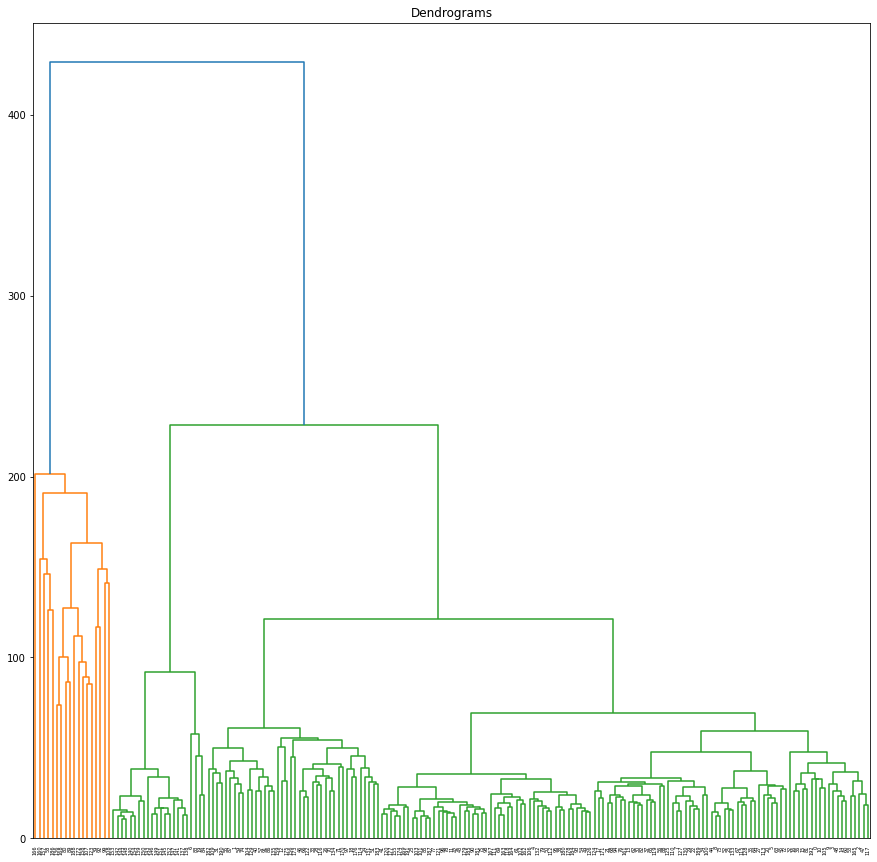

In [13]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(15, 15))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [14]:
from sklearn.cluster import AgglomerativeClustering

n_cluster = 20
clustering = AgglomerativeClustering(linkage = "ward", n_clusters = n_cluster)
clustering.fit(data)
clusters = clustering.labels_

In [15]:
clusters

array([ 4,  2,  4,  4,  4,  4,  5,  4,  4,  4,  4,  4,  2,  4,  4,  4,  4,
        4,  2,  5,  4,  4,  4,  4,  2,  4,  2,  4,  2,  4,  4,  2,  4,  2,
        4,  4,  4,  4,  4, 13,  2,  4,  4,  4,  4,  4,  2,  4,  4,  4,  4,
        2,  4,  4,  4,  2,  4,  2, 11,  2,  4,  4,  4,  4,  4,  4,  2,  4,
        4,  4,  2,  2,  4,  4,  2,  4,  4,  4,  4,  4, 19,  4,  4,  5,  5,
        4,  2,  2,  4, 18,  4,  2, 10,  4,  4,  4,  4,  2,  4,  9,  4,  4,
        4,  4,  2,  4,  4,  0, 12,  2,  4,  4,  4,  4,  2,  4,  2,  4,  4,
        4,  4,  4,  2,  0,  4,  4,  4,  4,  4,  2,  4,  2,  4,  4,  2,  2,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  4,  2, 17,  8,  2, 14,  4,  4,  4,  4,  4, 15,  4,  1,  4,
        2,  4, 16,  2,  4,  2,  2,  4,  4,  4,  4,  4,  2,  2,  4,  4,  7,
        4,  6,  4,  2,  4,  4])

In [16]:
cluster_dict = {}
for i in range(n_cluster):
  cluster_dict[i] = data.index[np.where(clusters == i)]
cluster_dict

{0: Index(['endanger', 'incur'], dtype='object'),
 1: Index(['normalize', 'regularize'], dtype='object'),
 2: Index(['use', 'follow', 'apply', 'leave', 'set', 'show', 'approach', 'build',
        'deal', 'gain', 'include', 'look', 'offer', 'play', 'rise', 'test',
        'train', 'work', 'buy', 'call', 'choose', 'convert', 'divide',
        'estimate', 'fall', 'gather', 'increase', 'invest', 'lead', 'measure',
        'move', 'open', 'present', 'replace', 'run', 'see', 'send',
        'supplement', 'support', 'view'],
       dtype='object'),
 3: Index(['not accept', 'not allow', 'not be', 'not claim', 'not consider',
        'not explain', 'not follow', 'not generate', 'not implement',
        'not improve', 'not involve', 'not observe', 'not remove', 'not take',
        'not trade', 'not transfer', 'not turn', 'not value'],
       dtype='object'),
 4: Index(['be', 'have', 'take', 'become', 'combine', 'perform', 'employ', 'find',
        'make', 'analyze',
        ...
        'spend', 

In [17]:
common_financial_verbs = [
    'buy', 'sell', 'crypto', 'trade', 'price', 'transfer', 'perturb', 'yield', 'invest'
]

In [18]:
max_cluster_rel_dict = {}
for key, value in cluster_dict.items():
  tok = " ".join(value)
  flag = 0
  for verb in common_financial_verbs:
    if verb in tok:
      max_cluster_rel_dict[key] = verb
      flag = 1
  if flag == 0:
    max = 0
    for val in value:
      if rel_dict[val] >= max:
        max = rel_dict[val]
        max_cluster_rel_dict[key] = val
max_cluster_rel_dict

{0: 'incur',
 1: 'regularize',
 2: 'invest',
 3: 'transfer',
 4: 'invest',
 5: 'is author of',
 6: 'underlie',
 7: 'underestimate',
 8: 'precede',
 9: 'decompose',
 10: 'collude',
 11: 'outperform',
 12: 'endorse',
 13: 'correlate',
 14: 'prevail',
 15: 'recalculate',
 16: 'revert',
 17: 'optimize',
 18: 'characterize',
 19: 'analyse'}

In [19]:
## Assigning each relation to a class as determined by the above algo
relation_cluster_ontology = {}
for key, value in cluster_dict.items():
  for val in value:
    relation_cluster_ontology[val] = max_cluster_rel_dict[key].upper()
relation_cluster_ontology

{'endanger': 'INCUR',
 'incur': 'INCUR',
 'normalize': 'REGULARIZE',
 'regularize': 'REGULARIZE',
 'use': 'INVEST',
 'follow': 'INVEST',
 'apply': 'INVEST',
 'leave': 'INVEST',
 'set': 'INVEST',
 'show': 'INVEST',
 'approach': 'INVEST',
 'build': 'INVEST',
 'deal': 'INVEST',
 'gain': 'INVEST',
 'include': 'INVEST',
 'look': 'INVEST',
 'offer': 'INVEST',
 'play': 'INVEST',
 'rise': 'INVEST',
 'test': 'INVEST',
 'train': 'INVEST',
 'work': 'INVEST',
 'buy': 'INVEST',
 'call': 'INVEST',
 'choose': 'INVEST',
 'convert': 'INVEST',
 'divide': 'INVEST',
 'estimate': 'INVEST',
 'fall': 'INVEST',
 'gather': 'INVEST',
 'increase': 'INVEST',
 'invest': 'INVEST',
 'lead': 'INVEST',
 'measure': 'INVEST',
 'move': 'INVEST',
 'open': 'INVEST',
 'present': 'INVEST',
 'replace': 'INVEST',
 'run': 'INVEST',
 'see': 'INVEST',
 'send': 'INVEST',
 'supplement': 'INVEST',
 'support': 'INVEST',
 'view': 'INVEST',
 'not accept': 'TRANSFER',
 'not allow': 'TRANSFER',
 'not be': 'TRANSFER',
 'not claim': 'TRANS

In [20]:
assert relation_cluster_ontology.keys() == rel_dict.keys()

#### Final Type of Relations

In [21]:
relation_class = list(set([i.upper() for i  in list(relation_cluster_ontology.values())]))
relation_class

['UNDERLIE',
 'IS AUTHOR OF',
 'ENDORSE',
 'REVERT',
 'UNDERESTIMATE',
 'PRECEDE',
 'PREVAIL',
 'CORRELATE',
 'RECALCULATE',
 'INVEST',
 'CHARACTERIZE',
 'OPTIMIZE',
 'DECOMPOSE',
 'INCUR',
 'TRANSFER',
 'ANALYSE',
 'COLLUDE',
 'REGULARIZE',
 'OUTPERFORM']

In [22]:
len(relation_class)

19

## Entity Ontology

In [23]:
import numpy as np
import pandas as pd

entities = np.append(np.array(triplets)[:, 0], np.array(triplets)[:, 2])

In [24]:
entities.shape

(840,)

In [25]:
unique_entities, count = np.unique(entities, return_counts = True)
entities_dict = dict(zip(unique_entities, count))
entities_dict = dict(sorted(entities_dict.items(), key = lambda x: x[1], reverse = True))
entities_dict

{'Zeyd Boukhers': 5,
 'miner': 5,
 'user': 5,
 'Nick James': 4,
 'Random Forest': 4,
 'briber': 4,
 'cryptocurrencie': 4,
 'investor': 4,
 'place': 4,
 'Alexandre Bovet': 3,
 'Jakob Albers': 3,
 'LSTM': 3,
 'Stjepan Begušić': 3,
 'Tetsuya Takaishi': 3,
 'Xiaotong Sun': 3,
 'mine': 3,
 'money': 3,
 'trader': 3,
 'when': 3,
 'Alessandra Cretarola': 2,
 'David Zhao': 2,
 'GCN': 2,
 'Maria Glenski': 2,
 'Misha Perepelitsa': 2,
 'Mohsen Asgari': 2,
 'Pavel Ciaian': 2,
 'Qiutong Guo': 2,
 'Reaz Chowdhury': 2,
 'Shinji Kakinaka': 2,
 'Stanisław Drożdż': 2,
 'Vaiva Vasiliauskaite': 2,
 'Yoshi Fujiwara': 2,
 'Z. Keskin': 2,
 'a reward': 2,
 'a user': 2,
 'always': 2,
 'an exchange': 2,
 'available': 2,
 'both model': 2,
 'bribe': 2,
 'bribery': 2,
 'crypto - market': 2,
 'cryptocurrency market': 2,
 'each player': 2,
 'for Bitcoin': 2,
 'future work': 2,
 'logistic regression': 2,
 'masood Tadi': 2,
 'mining': 2,
 'more expensive': 2,
 'potential loss': 2,
 'price': 2,
 'skilled arbitrageur': 2

In [26]:
len(entities_dict)

741

#### Generating Embeddings for each Entity

In [27]:
from finbert_embedding.embedding import FinbertEmbedding

finbert_en = FinbertEmbedding()

entity_token_emb = {}
# rel_combined = list(set(" ".join(rel_dict.keys()).split(" ")))
for i in entities_dict.keys():
  word_embedding = finbert_en.word_vector(i)
  entity_token_emb[i] = word_embedding

In [28]:
assert entities_dict.keys() == entity_token_emb.keys()

In [29]:
entity_final_embedding = {}

for key in entity_token_emb.keys():
  numpy_tensor = []
  for i in entity_token_emb[key]:
    numpy_tensor.append(i.numpy())
  numpy_tensor = np.array(numpy_tensor)
  entity_final_embedding[key] = np.mean(numpy_tensor, axis = 0)

In [30]:
assert entities_dict.keys() == entity_final_embedding.keys()
assert entity_token_emb.keys() == entity_final_embedding.keys()

for i in entity_final_embedding:
  assert entity_final_embedding[i].shape[0] == 768

#### Converting Entity Embedding Dict into panadas DataFrame

In [31]:
entity_data = pd.DataFrame(entity_final_embedding.values(), index = entity_final_embedding.keys())
entity_data

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
Zeyd Boukhers,-3.796938,0.612231,-6.051088,-6.533643,1.880823,-3.196627,-1.097789,2.777275,1.531292,-4.619313,...,-1.779949,-0.293806,-4.197903,-5.387949,-2.010228,-5.907925,-0.120217,-1.501981,-0.423621,1.164246
miner,0.143342,1.719948,-1.987441,-0.091037,2.935660,3.205874,1.056265,0.931866,1.544047,-6.555081,...,-0.161148,-2.066377,-3.744068,-0.286667,-0.459972,-3.033450,2.931897,1.524858,0.915216,-0.261363
user,-2.777181,0.490600,-0.883422,0.692538,4.469756,2.421407,-0.045202,1.376595,0.605627,-4.586018,...,1.635480,-0.180772,-3.623164,-1.926026,-1.456143,-2.750196,2.334470,1.359157,-0.723677,-0.094642
Nick James,-2.417443,2.634815,-1.294508,-0.469548,3.250772,2.360700,2.820241,-0.054779,-0.681584,-2.177402,...,-1.355289,1.023082,-3.134606,-3.507453,1.409998,-1.299134,2.478810,-1.150198,-1.844654,-2.121345
Random Forest,0.650364,-1.079317,0.474100,-0.075929,2.819369,3.700642,-1.993024,1.481611,-2.247653,-3.362997,...,3.591384,-1.867174,-0.987775,-2.965251,-2.547905,-0.891894,0.964993,1.471233,0.966376,-2.402838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
with several model,-1.052210,0.761277,-0.073917,0.242625,1.914986,2.139977,-3.015314,-0.927982,-0.568197,-1.674318,...,2.569128,-0.580394,-2.787270,-1.216353,-1.788821,-2.623838,2.235875,-0.249570,0.438935,-0.803878
with technical,-1.947807,-0.348845,-0.326668,-0.160365,0.817531,2.002831,-1.707808,1.570567,0.048898,-1.734167,...,0.663479,1.081462,-2.393002,-3.020935,-0.697125,-2.406205,2.284837,-0.938971,-1.110727,1.583201
with this issue,-1.474341,1.639727,-0.497025,0.160707,2.379897,0.756161,-2.293403,1.706491,-3.043351,-2.162255,...,-0.735120,-0.561186,0.702801,-2.607513,-1.671090,-1.865122,4.396335,-1.271593,-1.165078,-0.339441
zero residual,-0.456308,-0.752206,-0.159973,-1.582413,2.291177,1.370055,-1.087104,2.237777,1.294938,-2.995764,...,1.448269,1.380466,-0.129700,-2.327151,-0.186159,-3.398462,1.189884,1.157061,1.824186,0.571554


#### Hierarchial Clustering

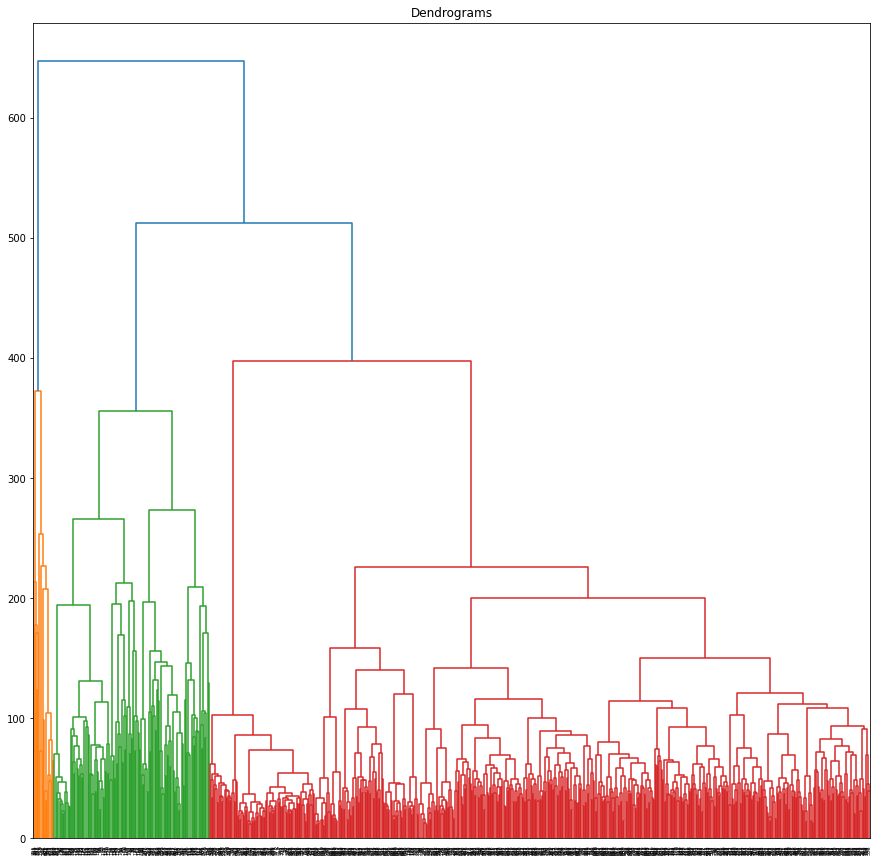

In [32]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(15, 15))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(entity_data, method='ward'))

In [33]:
from sklearn.cluster import AgglomerativeClustering

n_cluster = 25
clustering = AgglomerativeClustering(linkage = "ward", n_clusters = n_cluster)
clustering.fit(entity_data)
clusters = clustering.labels_

In [34]:
clusters

array([ 3, 15, 15,  4,  6, 11,  9, 15, 15,  4,  4, 13,  2, 18, 19, 15, 15,
       15, 15,  7,  4, 13,  4,  2,  3,  4, 19, 24, 18,  2,  2, 18,  4,  0,
        0, 15,  0,  0,  6, 15, 15,  1,  1,  6,  8,  1,  1,  3, 15,  6,  1,
       15, 14, 15,  5,  6,  6,  5,  0,  0,  0,  0,  4, 15, 15,  5, 15,  6,
        6,  1, 15,  6,  3, 24,  4,  4,  7,  4, 13,  1,  8,  1,  1,  1,  5,
        1,  4,  6,  4,  4, 19, 15,  1,  1,  4,  7,  1,  8, 11, 15,  1, 19,
        7,  1,  4,  1,  1,  5, 13, 13,  1, 11, 13,  1,  3,  4,  2, 24, 19,
        4,  4,  4,  4, 15, 18,  4, 17,  4,  2,  7,  4, 13, 13,  2,  4,  4,
        4, 10,  4,  4,  4,  4, 13,  4,  4, 13, 24, 20, 19, 24,  1, 18, 19,
        4,  1,  1, 19, 19, 15, 13, 19, 19, 19, 19,  6,  1,  6,  5,  6,  1,
        0,  6,  0, 16,  6,  6,  6,  1,  6,  0,  6,  6,  6,  6,  6,  0,  6,
        6,  6,  6,  0,  6,  6,  6,  6,  6,  6,  6,  6,  1,  6,  6,  6,  6,
        6,  6,  8,  6, 15,  1,  0,  0, 15,  1,  6,  6,  6, 15,  6,  5,  1,
        1,  0,  0,  0,  6

In [35]:
entity_cluster_dict = {}
for i in range(n_cluster):
  entity_cluster_dict[i] = entity_data.index[np.where(clusters == i)]
entity_cluster_dict

{0: Index(['a reward', 'a user', 'an exchange', 'available', 'the model',
        'this approach', 'this problem', 'this study', 'a bribe', 'a concern',
        'a feature', 'a light', 'a methodology', 'additional analysis',
        'additional light', 'all other player', 'all other variable',
        'all product', 'an attacker', 'an interface', 'available alternative',
        'by news', 'by problem', 'by run exchange', 'data', 'data collection',
        'figure 11', 'for detection', 'for further research', 'for grant',
        'frequent event', 'further prominence', 'here', 'linear law',
        'more attention', 'more compact', 'more complex', 'more insight',
        'more interesting', 'more power', 'more pronounced',
        'noisy information', 'other', 'other research', 'several source',
        'significance test', 'significant information transfer',
        'splitting order', 'the account', 'the citizen', 'the community',
        'the discussion', 'the door', 'the equivalence

#### Applying NER on these Clusters to find appropriate class

In [36]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [37]:
entity_cluster_NER = {}
for key, value in entity_cluster_dict.items():
  temp = []
  for val in value:
    doc = nlp(str(val))
    for ent in doc.ents:
      temp.append(ent.label_)
  if len(temp) == 0:
    temp.append("MISCELLANEOUS")
  entity_cluster_NER[key] = temp
entity_cluster_NER

{0: ['CARDINAL', 'ORG', 'ORG'],
 1: ['DATE',
  'GPE',
  'ORG',
  'ORG',
  'ORG',
  'ORG',
  'ORG',
  'ORG',
  'PERSON',
  'GPE',
  'PRODUCT',
  'NORP',
  'DATE',
  'CARDINAL',
  'ORG',
  'ORG',
  'CARDINAL',
  'ORG',
  'ORG',
  'DATE',
  'DATE',
  'NORP',
  'DATE',
  'ORG',
  'ORG',
  'ORG',
  'ORG',
  'ORG',
  'ORG',
  'ORG',
  'DATE',
  'ORG',
  'ORG',
  'ORG',
  'PERSON',
  'CARDINAL',
  'WORK_OF_ART'],
 2: ['PERSON', 'PERSON', 'ORG', 'PERSON', 'PERSON', 'PERSON'],
 3: ['PERSON', 'PERSON', 'ORG'],
 4: ['PERSON',
  'PERSON',
  'PERSON',
  'PERSON',
  'PERSON',
  'PERSON',
  'PERSON',
  'PERSON',
  'PERSON',
  'PERSON',
  'PERSON',
  'PERSON',
  'PERSON',
  'PERSON',
  'PERSON',
  'PERSON',
  'PERSON',
  'PERSON',
  'PERSON',
  'ORG',
  'PERSON',
  'PERSON',
  'PERSON',
  'PERSON',
  'PERSON',
  'PERSON',
  'ORG',
  'PERSON',
  'PERSON',
  'ORG'],
 5: ['ORG'],
 6: ['ORG',
  'ORG',
  'ORG',
  'ORG',
  'ORG',
  'ORG',
  'CARDINAL',
  'TIME',
  'CARDINAL',
  'PERCENT',
  'ORG',
  'PERSON

In [38]:
## Calculating frequency of type of entities in each cluster
entity_cluster_NER_count = {}
for key, value in entity_cluster_NER.items():
  unique, count = np.unique(value, return_counts = True)
  ner_count = dict(zip(unique, count))
  ner_count = dict(sorted(ner_count.items(), key = lambda x: x[1], reverse = True))
  entity_cluster_NER_count[key] = ner_count
entity_cluster_NER_count

{0: {'ORG': 2, 'CARDINAL': 1},
 1: {'ORG': 20,
  'DATE': 6,
  'CARDINAL': 3,
  'GPE': 2,
  'NORP': 2,
  'PERSON': 2,
  'PRODUCT': 1,
  'WORK_OF_ART': 1},
 2: {'PERSON': 5, 'ORG': 1},
 3: {'PERSON': 2, 'ORG': 1},
 4: {'PERSON': 27, 'ORG': 3},
 5: {'ORG': 1},
 6: {'ORG': 12, 'CARDINAL': 8, 'GPE': 3, 'PERSON': 2, 'PERCENT': 1, 'TIME': 1},
 7: {'PERSON': 5},
 8: {'PERSON': 2},
 9: {'ORG': 1},
 10: {'MISCELLANEOUS': 1},
 11: {'ORG': 1},
 12: {'MISCELLANEOUS': 1},
 13: {'ORG': 8, 'PERSON': 1},
 14: {'ORG': 1},
 15: {'ORG': 3, 'CARDINAL': 2, 'DATE': 1, 'GPE': 1, 'ORDINAL': 1},
 16: {'ORG': 5},
 17: {'ORG': 1},
 18: {'PERSON': 5},
 19: {'PERSON': 13, 'ORG': 1},
 20: {'ORG': 1},
 21: {'MISCELLANEOUS': 1},
 22: {'MISCELLANEOUS': 1},
 23: {'MISCELLANEOUS': 1},
 24: {'PERSON': 3, 'ORG': 1}}

In [39]:
## Dictionary for handling those entities which do not belong to any class
## Assigning the most frequent type as the type to the complete cluster
max_ner_dict = {}
for key, value in entity_cluster_NER_count.items():
  max_ner_dict[key] = list(value.keys())[0]
max_ner_dict

{0: 'ORG',
 1: 'ORG',
 2: 'PERSON',
 3: 'PERSON',
 4: 'PERSON',
 5: 'ORG',
 6: 'ORG',
 7: 'PERSON',
 8: 'PERSON',
 9: 'ORG',
 10: 'MISCELLANEOUS',
 11: 'ORG',
 12: 'MISCELLANEOUS',
 13: 'ORG',
 14: 'ORG',
 15: 'ORG',
 16: 'ORG',
 17: 'ORG',
 18: 'PERSON',
 19: 'PERSON',
 20: 'ORG',
 21: 'MISCELLANEOUS',
 22: 'MISCELLANEOUS',
 23: 'MISCELLANEOUS',
 24: 'PERSON'}

In [40]:
common_financial_entities = [
    'miner', 'trader', 'consensus', 'blockchain', 'cryptography', 'defi',
    'margin', 'mining', 'NFT', 'token', 'halving', 'custody', 'staking', 'portfolio',
    'service provider', 'ATM', 'events', 'DeFi', 'fiat', 'ledger', 'hash rate',
    'branches', 'call option', 'legal', 'derivative', 'contract', 'legal'
]

In [41]:
max_cluster_entity_dict = {}
for key, value in entity_cluster_dict.items():
  tok = " ".join(value)
  flag = 0
  for verb in common_financial_entities:
    if verb in tok:
      max_cluster_entity_dict[key] = verb
      flag = 1
  if flag == 0:
    max_cluster_entity_dict[key] = max_ner_dict[key]
max_cluster_entity_dict

{0: 'mining',
 1: 'contract',
 2: 'PERSON',
 3: 'PERSON',
 4: 'PERSON',
 5: 'portfolio',
 6: 'ATM',
 7: 'PERSON',
 8: 'blockchain',
 9: 'ORG',
 10: 'MISCELLANEOUS',
 11: 'ORG',
 12: 'MISCELLANEOUS',
 13: 'ORG',
 14: 'ORG',
 15: 'mining',
 16: 'ORG',
 17: 'ORG',
 18: 'PERSON',
 19: 'PERSON',
 20: 'ORG',
 21: 'MISCELLANEOUS',
 22: 'MISCELLANEOUS',
 23: 'MISCELLANEOUS',
 24: 'PERSON'}

In [42]:
## Assigning each entity to a class as determined by the above algo
entity_cluster_ontology = {}
for key, value in entity_cluster_dict.items():
  for val in value:
    entity_cluster_ontology[val] = max_cluster_entity_dict[key].upper()
entity_cluster_ontology

{'a reward': 'MINING',
 'a user': 'MINING',
 'an exchange': 'MINING',
 'available': 'MINING',
 'the model': 'MINING',
 'this approach': 'MINING',
 'this problem': 'MINING',
 'this study': 'MINING',
 'a bribe': 'MINING',
 'a concern': 'MINING',
 'a feature': 'MINING',
 'a light': 'MINING',
 'a methodology': 'MINING',
 'additional analysis': 'MINING',
 'additional light': 'MINING',
 'all other player': 'MINING',
 'all other variable': 'MINING',
 'all product': 'MINING',
 'an attacker': 'MINING',
 'an interface': 'MINING',
 'available alternative': 'MINING',
 'by news': 'MINING',
 'by problem': 'MINING',
 'by run exchange': 'MINING',
 'data': 'MINING',
 'data collection': 'MINING',
 'figure 11': 'MINING',
 'for detection': 'MINING',
 'for further research': 'MINING',
 'for grant': 'MINING',
 'frequent event': 'MINING',
 'further prominence': 'MINING',
 'here': 'MINING',
 'linear law': 'MINING',
 'more attention': 'MINING',
 'more compact': 'MINING',
 'more complex': 'MINING',
 'more insig

In [43]:
assert entity_cluster_ontology.keys() == entities_dict.keys()

#### Final types of enities

In [44]:
entity_class = list(set(list(entity_cluster_ontology.values())))
entity_class

['PORTFOLIO',
 'MISCELLANEOUS',
 'PERSON',
 'ORG',
 'BLOCKCHAIN',
 'MINING',
 'ATM',
 'CONTRACT']

In [45]:
len(entity_class)

8

#### Converting ontology to json format

In [46]:
import json

res = {"relation" : relation_cluster_ontology,
       "entities" : entity_cluster_ontology}

json_object = json.dumps(res)

with open("allennlp_ontology.json", 'w') as f:
  f.write(json_object)

#### Code to demonstrate how to read the json

In [47]:
with open("allennlp_ontology.json", 'r') as f:
  read_res = json.load(f)

In [48]:
read_res["relation"]

{'endanger': 'INCUR',
 'incur': 'INCUR',
 'normalize': 'REGULARIZE',
 'regularize': 'REGULARIZE',
 'use': 'INVEST',
 'follow': 'INVEST',
 'apply': 'INVEST',
 'leave': 'INVEST',
 'set': 'INVEST',
 'show': 'INVEST',
 'approach': 'INVEST',
 'build': 'INVEST',
 'deal': 'INVEST',
 'gain': 'INVEST',
 'include': 'INVEST',
 'look': 'INVEST',
 'offer': 'INVEST',
 'play': 'INVEST',
 'rise': 'INVEST',
 'test': 'INVEST',
 'train': 'INVEST',
 'work': 'INVEST',
 'buy': 'INVEST',
 'call': 'INVEST',
 'choose': 'INVEST',
 'convert': 'INVEST',
 'divide': 'INVEST',
 'estimate': 'INVEST',
 'fall': 'INVEST',
 'gather': 'INVEST',
 'increase': 'INVEST',
 'invest': 'INVEST',
 'lead': 'INVEST',
 'measure': 'INVEST',
 'move': 'INVEST',
 'open': 'INVEST',
 'present': 'INVEST',
 'replace': 'INVEST',
 'run': 'INVEST',
 'see': 'INVEST',
 'send': 'INVEST',
 'supplement': 'INVEST',
 'support': 'INVEST',
 'view': 'INVEST',
 'not accept': 'TRANSFER',
 'not allow': 'TRANSFER',
 'not be': 'TRANSFER',
 'not claim': 'TRANS

In [49]:
read_res["entities"]

{'a reward': 'MINING',
 'a user': 'MINING',
 'an exchange': 'MINING',
 'available': 'MINING',
 'the model': 'MINING',
 'this approach': 'MINING',
 'this problem': 'MINING',
 'this study': 'MINING',
 'a bribe': 'MINING',
 'a concern': 'MINING',
 'a feature': 'MINING',
 'a light': 'MINING',
 'a methodology': 'MINING',
 'additional analysis': 'MINING',
 'additional light': 'MINING',
 'all other player': 'MINING',
 'all other variable': 'MINING',
 'all product': 'MINING',
 'an attacker': 'MINING',
 'an interface': 'MINING',
 'available alternative': 'MINING',
 'by news': 'MINING',
 'by problem': 'MINING',
 'by run exchange': 'MINING',
 'data': 'MINING',
 'data collection': 'MINING',
 'figure 11': 'MINING',
 'for detection': 'MINING',
 'for further research': 'MINING',
 'for grant': 'MINING',
 'frequent event': 'MINING',
 'further prominence': 'MINING',
 'here': 'MINING',
 'linear law': 'MINING',
 'more attention': 'MINING',
 'more compact': 'MINING',
 'more complex': 'MINING',
 'more insig